<a href="https://colab.research.google.com/github/zilioalberto/N3_Ciencia_Dados/blob/main/01_eda_N3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N3 — 01_eda_N3 (EDA executiva)

Objetivo:
- Validar rapidamente a base `base_modelagem.csv`
- Mostrar distribuição do target `preco_m2`
- Ver nulos/tipos, estatísticas básicas
- Ver correlação de variáveis numéricas com o target
- Comparações simples por flags/categorias (quando existirem)

**Dados lidos diretamente do GitHub (RAW):**
- `base_modelagem.csv`
- `etl_report.json`


In [1]:
from __future__ import annotations

import json
from pathlib import Path
from urllib.request import urlopen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

# URLs RAW (GitHub)
CSV_URL = "https://raw.githubusercontent.com/zilioalberto/N3_Ciencia_Dados/main/data/dataset_processado_N3/base_modelagem.csv"
REPORT_URL = "https://raw.githubusercontent.com/zilioalberto/N3_Ciencia_Dados/main/data/dataset_processado_N3/etl_report.json"

def read_json_from_url(url: str) -> dict:
    with urlopen(url) as resp:
        content = resp.read().decode("utf-8")
    return json.loads(content)

def find_project_root(start: Path | None = None) -> Path:
    start = (start or Path.cwd()).resolve()
    for p in [start, *start.parents]:
        if (p / "requirements.txt").exists() or (p / "README.md").exists() or (p / "data").exists():
            return p
    return start

ROOT = find_project_root()
OUT_DIR = ROOT / "data" / "dataset_processado_N3"
FIG_DIR = OUT_DIR / "figs_eda"
OUT_DIR.mkdir(parents=True, exist_ok=True)
FIG_DIR.mkdir(parents=True, exist_ok=True)

ROOT, OUT_DIR, FIG_DIR


(PosixPath('/content'),
 PosixPath('/content/data/dataset_processado_N3'),
 PosixPath('/content/data/dataset_processado_N3/figs_eda'))

In [2]:
df = pd.read_csv(CSV_URL)

report = {}
try:
    report = read_json_from_url(REPORT_URL)
except Exception as e:
    print("Aviso: não foi possível ler etl_report.json do GitHub. Motivo:", repr(e))
    report = {}

print("Shape:", df.shape)
display(df.head(5))
report


Shape: (7780, 16)


,area,iptu,taxa_condominial,num_quartos,num_banheiros,num_suites,num_vagas_garagem,num_andares,tipo_imovel,estado_construcao,fonte,imovel_lancamento,bl_temporada,vista_mar_bin,mobiliado_bin,preco_m2
0,91.0,NaN,NaN,3,1,1,2,0,Apartamento,desconhecido,Viva Real,0,0,0,0,12751.219780
1,46.0,600.0,700.0,1,2,1,2,7,Apartamento,desconhecido,Viva Real,0,0,0,0,10000.000000
2,75.0,0.0,600.0,3,2,1,2,0,Apartamento,desconhecido,Viva Real,0,0,0,0,4133.333333
3,80.0,1600.0,850.0,3,2,0,1,0,Apartamento,desconhecido,Viva Real,0,0,1,1,8600.000000
4,77.0,1300.0,999.0,3,2,1,2,0,Apartamento,desconhecido,Viva Real,0,0,0,0,13896.103896


{'raw_url': 'https://raw.githubusercontent.com/zilioalberto/N3_Ciencia_Dados/main/data/dataset_original/tb_mercadoimob.csv',
 'raw_path': '/content/data/dataset_original/tb_mercadoimob.csv',
 'out_path': '/content/data/dataset_processado_N3/base_modelagem.csv',
 'raw_shape': [9236, 41],
 'after_basic_filters_shape': [7780, 44],
 'model_shape': [7780, 16],
 'features': ['area',
  'iptu',
  'taxa_condominial',
  'num_quartos',
  'num_banheiros',
  'num_suites',
  'num_vagas_garagem',
  'num_andares',
  'tipo_imovel',
  'estado_construcao',
  'fonte',
  'imovel_lancamento',
  'bl_temporada',
  'vista_mar_bin',
  'mobiliado_bin'],
 'target': 'preco_m2',
 'notes': ['O dataset foi filtrado para tipo_negocio==Venda (se a coluna existir).',
  'preco_m2 possui clipping por IQR para reduzir influência de outliers sem descartar linhas.',
  'O CSV é baixado do GitHub e cacheado em RAW_PATH quando não existir localmente.']}

In [3]:
target = report.get("target", "preco_m2")
if target not in df.columns:
    raise ValueError(f"Target '{target}' não encontrada. Colunas: {df.columns.tolist()}")

features = report.get("features")
if not features:
    features = [c for c in df.columns if c != target]

print("Target:", target)
print("Nº features:", len(features))

display(df[features + [target]].dtypes.value_counts())

null_pct = (df[features + [target]].isna().mean() * 100).sort_values(ascending=False)
display(null_pct.head(20))

df[target].describe()


Target: preco_m2
Nº features: 15


,count
int64,9
float64,4
object,3


,0
iptu,18.059126
taxa_condominial,13.586118
area,0.000000
num_quartos,0.000000
num_banheiros,0.000000
num_suites,0.000000
num_vagas_garagem,0.000000
num_andares,0.000000
tipo_imovel,0.000000
estado_construcao,0.000000


,preco_m2
count,7780.000000
mean,10194.245561
std,4334.635540
min,60.595568
25%,7030.683877
50%,9290.744467
75%,12941.176471
max,21806.915361


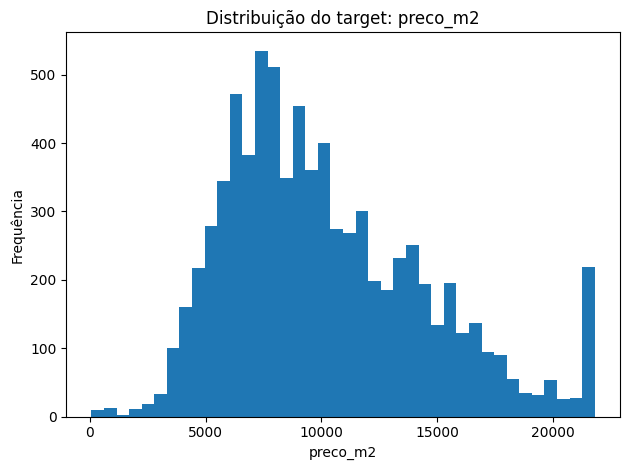

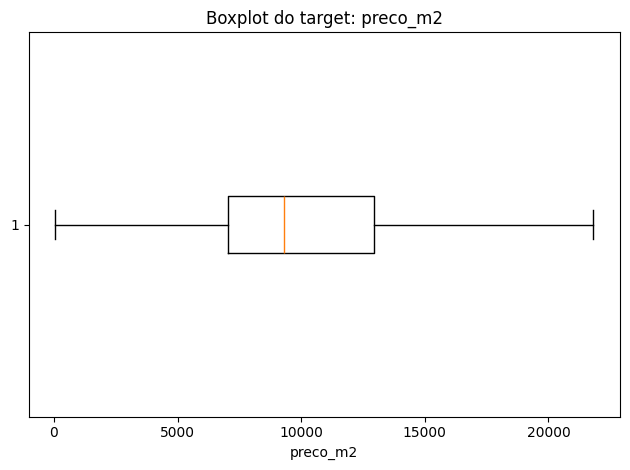

Figuras salvas em:
- /content/data/dataset_processado_N3/figs_eda/hist_preco_m2.png
- /content/data/dataset_processado_N3/figs_eda/box_preco_m2.png


In [4]:
vals = df[target].dropna()

plt.figure()
plt.hist(vals, bins=40)
plt.title(f"Distribuição do target: {target}")
plt.xlabel(target)
plt.ylabel("Frequência")
plt.tight_layout()
hist_path = FIG_DIR / f"hist_{target}.png"
plt.savefig(hist_path, dpi=160)
plt.show()

plt.figure()
plt.boxplot(vals, vert=False)
plt.title(f"Boxplot do target: {target}")
plt.xlabel(target)
plt.tight_layout()
box_path = FIG_DIR / f"box_{target}.png"
plt.savefig(box_path, dpi=160)
plt.show()

print("Figuras salvas em:")
print("-", hist_path)
print("-", box_path)


In [5]:
num_cols = df[features].select_dtypes(include=[np.number]).columns.tolist()

corr = df[num_cols + [target]].corr(numeric_only=True)[target].drop(target).sort_values(key=lambda s: s.abs(), ascending=False)
top_corr = corr.head(15).to_frame(name="corr_com_target")

display(top_corr)

corr_path = OUT_DIR / "eda_correlacoes_top15.csv"
top_corr.to_csv(corr_path, index=True)
print("Salvo:", corr_path)


,corr_com_target
num_suites,0.344518
num_banheiros,0.152012
vista_mar_bin,0.117485
area,-0.108652
num_andares,0.106652
num_quartos,0.087095
num_vagas_garagem,0.072217
mobiliado_bin,0.070611
iptu,-0.013831
taxa_condominial,0.007885


Salvo: /content/data/dataset_processado_N3/eda_correlacoes_top15.csv


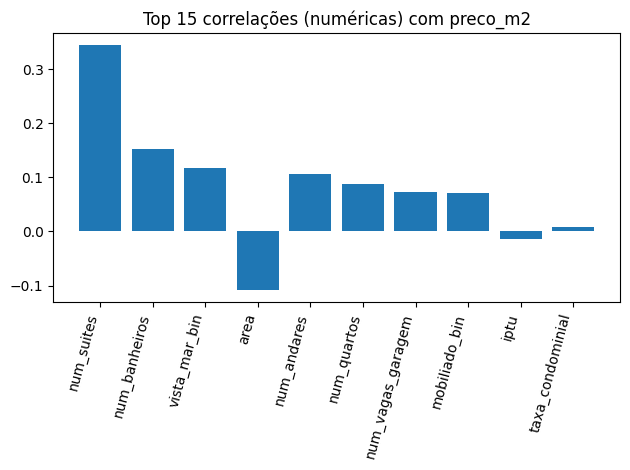

Figura salva: /content/data/dataset_processado_N3/figs_eda/top_corr_preco_m2.png


In [6]:
plt.figure()
plt.bar(top_corr.index.astype(str), top_corr["corr_com_target"].values)
plt.title(f"Top 15 correlações (numéricas) com {target}")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()

corr_fig = FIG_DIR / f"top_corr_{target}.png"
plt.savefig(corr_fig, dpi=160)
plt.show()

print("Figura salva:", corr_fig)


In [7]:
def compare_by_binary(col: str):
    if col not in df.columns:
        print(f"- Coluna '{col}' não existe (pulando).")
        return
    s = df[col]
    if s.dropna().nunique() > 10:
        print(f"- Coluna '{col}' tem muitos valores (não parece binária). Pulando.")
        return

    g = df[[col, target]].dropna().groupby(col)[target].agg(["count", "mean", "median"]).sort_index()
    print(f"\nComparação por {col}:")
    display(g)

compare_by_binary("vista_mar_bin")
compare_by_binary("mobiliado_bin")

possible_cat = ["tipo_imovel", "bairro", "cidade", "estado", "categoria", "tipo"]
cat_col = next((c for c in possible_cat if c in df.columns), None)

if cat_col:
    tmp = df[[cat_col, target]].dropna()
    top = tmp[cat_col].value_counts().head(10).index
    summary = tmp[tmp[cat_col].isin(top)].groupby(cat_col)[target].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)
    print(f"\nResumo por categoria ({cat_col}) — top 10 por frequência:")
    display(summary)
else:
    print("\nNenhuma coluna categórica comum encontrada para resumo (tipo_imovel/bairro/cidade/...).")



Comparação por vista_mar_bin:


,count,mean,median
vista_mar_bin,,,
0,6915,10014.143514,9154.545455
1,865,11634.020880,10876.325088



Comparação por mobiliado_bin:


,count,mean,median
mobiliado_bin,,,
0,5142,9975.031582,9090.909091
1,2638,10621.538313,9748.563218



Resumo por categoria (tipo_imovel) — top 10 por frequência:


,count,mean,median
tipo_imovel,,,
Flat,10,12570.636866,12968.750000
Cobertura,449,10909.395412,10396.039604
Apartamento,5583,10768.887619,9888.888889
Ponto Comercial/Loja/Box,138,10550.221073,9230.769231
Kitnet/Conjugado,7,9498.873874,10166.666667
Imóvel Comercial,137,8423.023481,7375.000000
Consultório,1001,8243.228427,7575.757576
Casa,353,7413.634841,6272.251309
NaoInformado,55,6241.226496,6027.397260


## Conclusões rápidas (para colocar no README)

- A base `base_modelagem.csv` está consistente para modelagem (shape, tipos e nulos verificados).
- O target `preco_m2` apresenta distribuição com dispersão e possíveis outliers (ver hist/boxplot salvos).
- As variáveis numéricas com maior relação com `preco_m2` aparecem em `eda_correlacoes_top15.csv`.
- Flags (`vista_mar_bin`, `mobiliado_bin`), quando presentes, ajudam a separar médias/medianas de `preco_m2`.
- Esses achados justificam o uso de modelos não lineares (ex.: RandomForest), capazes de capturar interações e efeitos combinados.
